In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("Titanic.csv").dropna(axis=1)
df.Sex = df.Sex.map({"male":0, "female":1})
X = df.iloc[:,1:]
Y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

clf_r = RandomForestClassifier()
tr_start = time.time()
clf_r.fit(x_train, y_train)
tr_end = time.time()
total_r = tr_end - tr_start
print(total_r)

clf_g = GradientBoostingClassifier()
tg_start = time.time()
clf_g.fit(x_train, y_train)
tg_end = time.time()
total_g = tg_end - tg_start
print(total_g)

clf_r2 = RandomForestClassifier()
r2_cv = GridSearchCV(clf_r2,{"max_depth":[1, 2, 3, 4, 5, 7, 8, 9, 10]})
r2_cv.fit(x_train, y_train)
r2_cv.best_estimator_



        




0.15621590614318848
0.06232023239135742


RandomForestClassifier(max_depth=7)

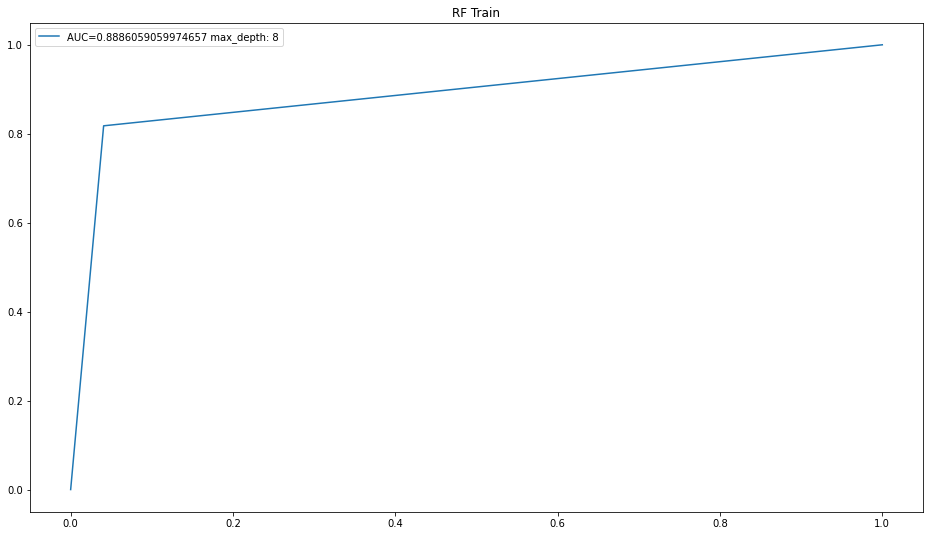

In [2]:
fpr = []
tpr = []

plt.figure(figsize=(16,9))
clf1 = RandomForestClassifier(max_depth = 8)
clf1.fit(x_train, y_train)
predicted_y = clf1.predict(x_train)
fpr, tpr, _ = metrics.roc_curve(y_train, predicted_y)
AUC_score = metrics.roc_auc_score(y_train, predicted_y)
plt.plot(fpr,tpr,label="AUC=" + str(AUC_score) + ' max_depth: ' + str(8))
plt.title("RF Train")
plt.legend()

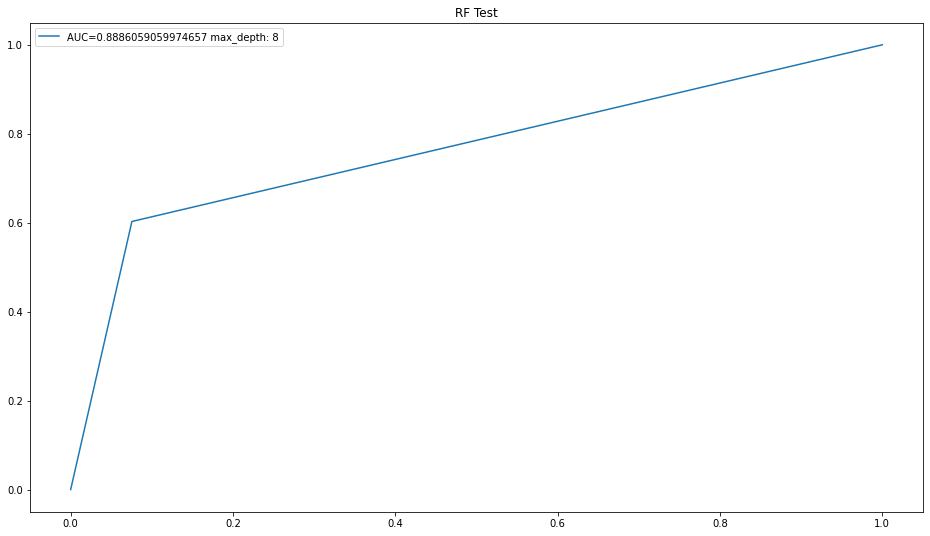

In [3]:
fpr2 = []
tpr2 = []

plt.figure(figsize=(16,9))
clf2 = RandomForestClassifier(max_depth = 8)
clf2.fit(x_train, y_train)
predicted_y2 = clf2.predict(x_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, predicted_y2)
AUC_score2 = metrics.roc_auc_score(y_test, predicted_y2)
plt.plot(fpr2,tpr2,label="AUC=" + str(AUC_score) + ' max_depth: ' + str(8))
plt.title("RF Test")
plt.legend()

In [4]:
clf_g2 = GradientBoostingClassifier()
g2_cv = GridSearchCV(clf_g2,{"max_depth":[1, 2, 3, 4, 5, 7, 8, 9, 10]})
g2_cv.fit(x_train, y_train)
g2_cv.best_estimator_

GradientBoostingClassifier(max_depth=4)

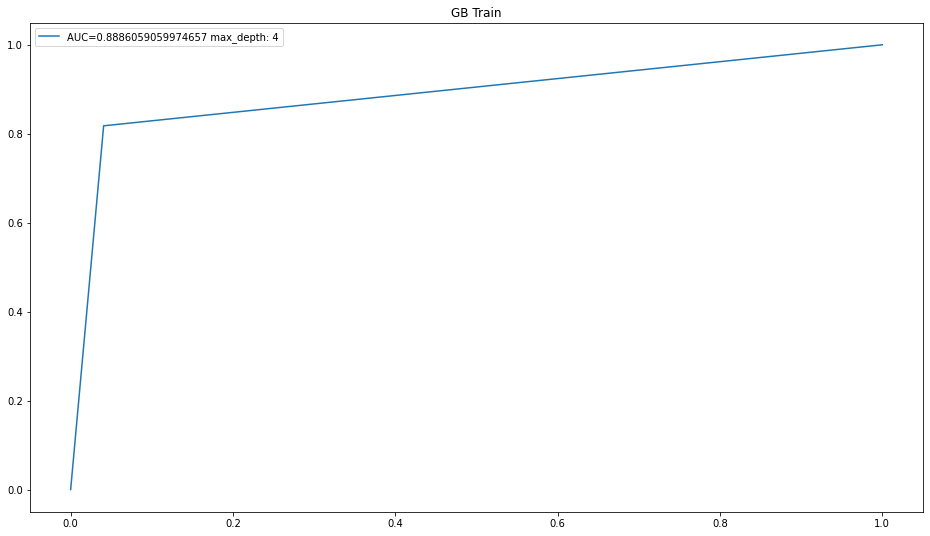

In [5]:
fpr3 = []
tpr3 = []

plt.figure(figsize=(16,9))
clf3 = GradientBoostingClassifier(max_depth = 4)
clf3.fit(x_train, y_train)
predicted_y3 = clf3.predict(x_train)
fpr3, tpr3, _ = metrics.roc_curve(y_train, predicted_y3)
AUC_score = metrics.roc_auc_score(y_train, predicted_y3)
plt.plot(fpr3,tpr3,label="AUC=" + str(AUC_score) + ' max_depth: ' + str(4))
plt.title("GB Train")
plt.legend()

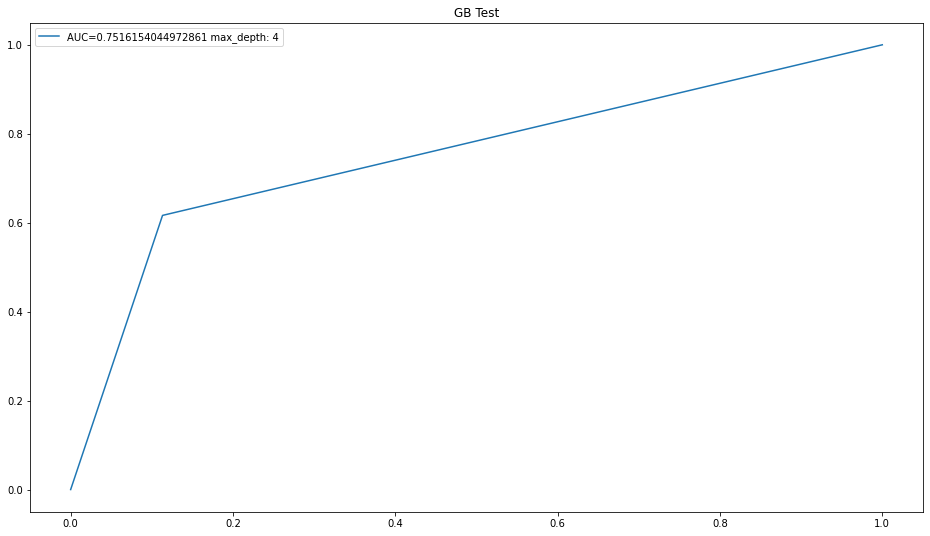

In [6]:
fpr4 = []
tpr4 = []

plt.figure(figsize=(16,9))
clf4 = GradientBoostingClassifier(max_depth = 4)
clf4.fit(x_train, y_train)
predicted_y4 = clf4.predict(x_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, predicted_y4)
AUC_score = metrics.roc_auc_score(y_test, predicted_y4)
plt.plot(fpr4,tpr4,label="AUC=" + str(AUC_score) + ' max_depth: ' + str(4))
plt.title("GB Test")
plt.legend()